# Social Media Listening Tools

Problem Research (Latar Belakang dan Pemahaman Masalah):
    Membantu market research untuk analyse social media untuk melihat trend dan data data yang ada di social media
Background problem dari project Anda

Business impact yang ditawarkan dari project Anda
    Pertumbuhan Growth revenue
Siapa target user dan apa benefit yang mereka peroleh?
    brand itu dapat insight terhadap company nya dan data yang valid untuk tindakan marketing 

Informasi singkat mengenai data yang akan digunakan
    Menggunakan API dari setiap social media untuk sekarang contohnya menggunakan tweepy

Darimana sumber datanya, bagaimana teknik pengumpulannya, dan apakah dapat dipertanggungjawabkan?
    Menggunakan API yang sudah disediakan dari social media tersebut
    
Fitur apa saja yang akan ada di dashboard?
    Search keyword, graph hasil analisis dan text

## Tampilan Dashboard yang diinginkan :

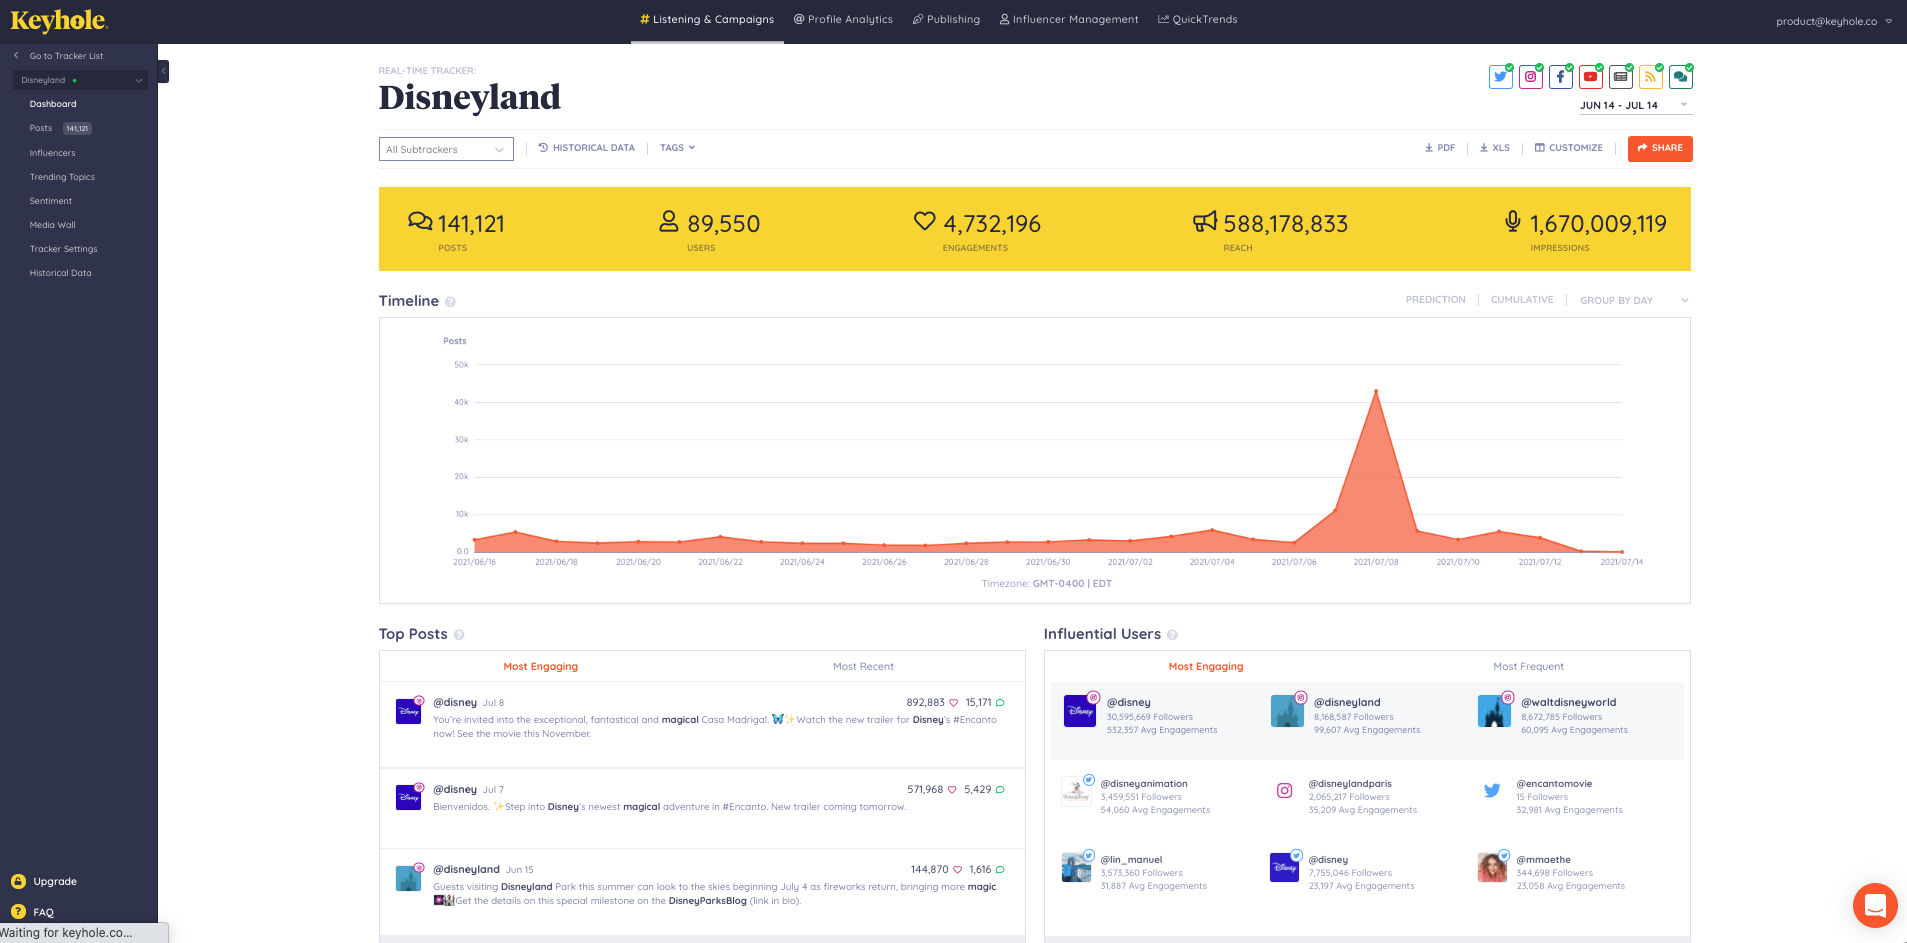

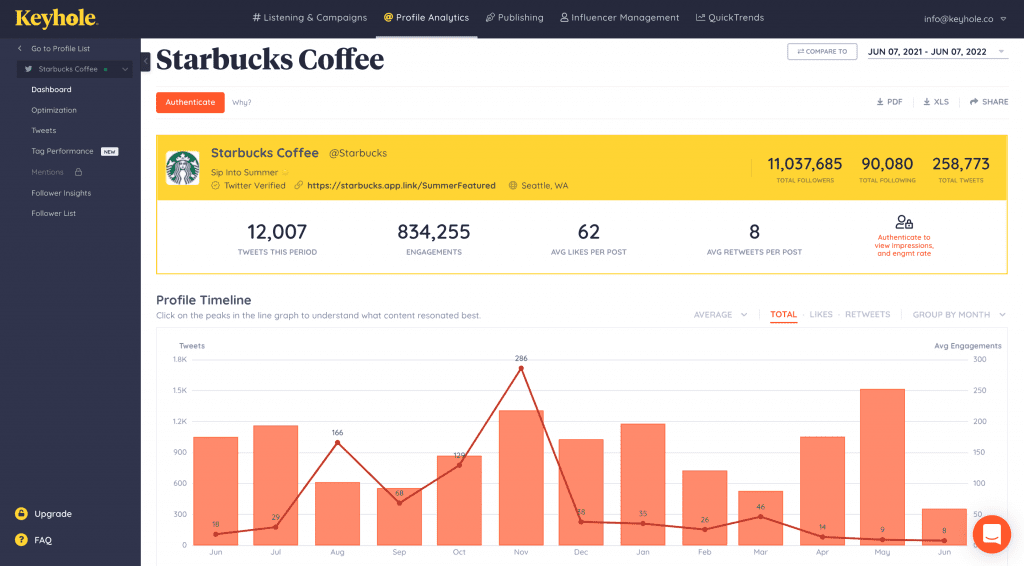

In [37]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'OHNyUUxMVkk0T3p5ZnJkckVBQkM6MTpjaQ'
        consumer_secret = 'lnjNBhgRNZMcQUZ9YBFXbt3zWqOCQogjw7JR4_-YWBsndJ3Pu7'
        access_token = '1475390866910896128-fKNRse1xBCdTlo2ilMaYCRFzCEta4C'
        access_token_secret = 'S6Vb0DUiBhDzNFxGldazvHzkuLzCakZOdSCjxlKrDfTK8'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])
                                    |(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'Donald Trump', count = 200)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
 
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
 
if __name__ == "__main__":
    # calling main function
    main()

SyntaxError: EOL while scanning string literal (3149410514.py, line 36)

## Output Target

Positive tweets percentage: 22 %
Negative tweets percentage: 15 %


Positive tweets:
RT @JohnGGalt: Amazing—after years of attacking Donald Trump the media managed
to turn #InaugurationDay into all about themselves.
#MakeAme…
RT @vooda1: CNN Declines to Air White House Press Conference Live YES! 
THANK YOU @CNN FOR NOT LEGITIMI…
RT @Muheeb_Shawwa: Donald J. Trump's speech sounded eerily familiar...
POTUS plans new deal for UK as Theresa May to be first foreign leader to meet new 
president since inauguration 
.@realdonaldtrump #Syria #Mexico #Russia & now #Afghanistan. 
Another #DearDonaldTrump Letter worth a read @AJEnglish 


Negative tweets:
RT @Slate: Donald Trump’s administration: “Government by the worst men.” 
RT @RVAwonk: Trump, Sean Spicer, et al. lie for a reason. 
Their lies are not just lies. Their lies are authoritarian propaganda.  
RT @KomptonMusic: Me: I hate corn 
Donald Trump: I hate corn too
Me: https://t.co/GPgy8R8HB5
It's ridiculous that people are more annoyed at this than Donald Trump's sexism.
RT @tony_broach: Chris Wallace on Fox news right now talking crap 
about Donald Trump news conference it seems he can't face the truth either…
RT @fravel: With False Claims, Donald Trump Attacks Media on Crowd Turnout 
Aziz Ansari Just Hit Donald Trump Hard In An Epic Saturday Night Live Monologue

Ref : https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/